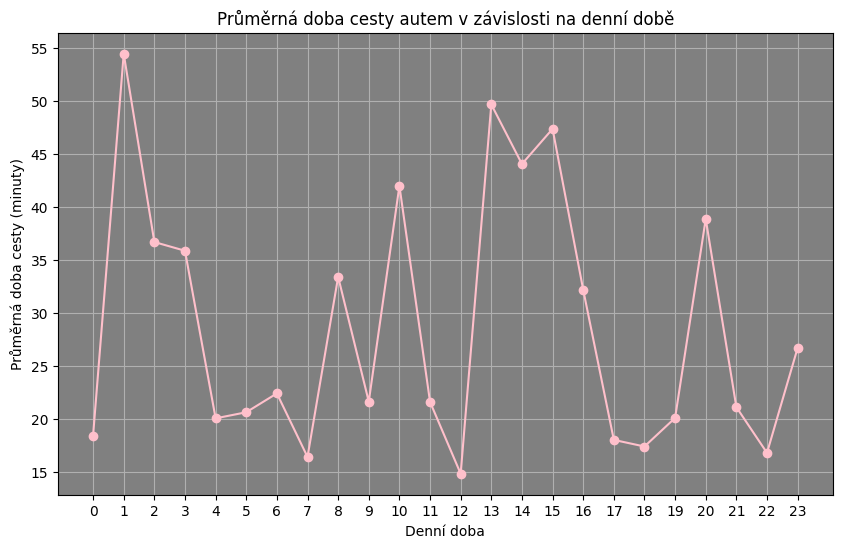

In [3]:
# MONTE CARLO 

import random
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def cesta_autem(hustota_dopravy):
    délka_cesty = random.uniform(10, 30) * (1 + hustota_dopravy)
    return délka_cesty

def hustota_dopravy_generator():
    return random.uniform(0, 1)

def simulace_dne():
    hodiny = []
    průměrná_doba_cesty = []
    for hodina in range(24):
        hustota_dopravy = hustota_dopravy_generator()
        délka_cesty = cesta_autem(hustota_dopravy)
        hodiny.append(hodina)
        průměrná_doba_cesty.append(délka_cesty)
        #print(f"Denní doba: {hodina}:00 - {hodina+1}:00, Hustota dopravy: {hustota_dopravy}, Průměrná doba cesty: {délka_cesty} minut")

    plt.figure(figsize=(10,6))
    plt.plot(hodiny, průměrná_doba_cesty, marker='o', color="pink")
    plt.gca().set_facecolor("gray")
    plt.title('Průměrná doba cesty autem v závislosti na denní době')
    plt.xlabel('Denní doba')
    plt.ylabel('Průměrná doba cesty (minuty)')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

simulace_dne()